# Advanced Sklearn Tools and Multi-Class and Imbalanced Class Machine Learning 

<b> Goals: </b>

- Learn how to use an array of advanced tools in sklearn such as Pipelines, GridSearch, and more
- Work on a supervised classification dataset with more than two classes, specifically the famous MNIST digits dataset.
- Work on a supervised classification dataset with imbalanced classes, specifically the credit card fraud dataset.

## Advanced Sklearn tools 

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, LabelBinarizer

/Users/roahuja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/roahuja/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#Load in titanic data

path = "../../data/titanic.csv"

titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Encoding aka dummy variables with sklearn

**One hot encoding:*** Transforming categorical variables 

In [4]:
#Assign X and y

X = titanic.drop("Survived", axis = 1)
y = titanic.Survived

In [5]:
#Make a train test split with the titanic data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

We're going to use LabelEncoder to turn the object values into numbers. Instead turning each unique value into a column a la dummy variables, this tool returns a single column and replaces the objects/strings with a number.

In [6]:
#Intialize LabelEncoder object

le = LabelEncoder()

#Use le on the sex column
sex_encoded = le.fit_transform(X_train.Sex)

sex_encoded[:20]


array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
X_train.Sex[:20]

188      male
754    female
149      male
847      male
568      male
148      male
774    female
307    female
801    female
180    female
116      male
477      male
256    female
504    female
678    female
512      male
74       male
579      male
517      male
219      male
Name: Sex, dtype: object

Turns male and female into a 1s and 0s.

The advantage of using this is that we can use the LabelEncoder object (le) to transform other data.

In [8]:
#Pass in the Sex column on the testing dataset into the le object

le.transform(X_test.Sex)[:20]


array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [9]:
X_test.Sex.iloc[:20]

350      male
176      male
723      male
404    female
306    female
665      male
607      male
151    female
265      male
865    female
408      male
78       male
200      male
40     female
709      male
785      male
876      male
64       male
852    female
429      male
Name: Sex, dtype: object

Now let's try this on the Embarked column

In [10]:
X_train.Embarked.fillna("unknown", inplace=True)
X_test.Embarked.fillna("unknown", inplace=True)

/Users/roahuja/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:

#Intialize LabelEncoder

le = LabelEncoder()


#Pass Embarked column into le object

emb_encoded = le.fit_transform(X_train.Embarked)


#Look at first twenty rows
emb_encoded[:20]

array([1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2])

In [12]:
# Call .classes_ to see the original object values
le.classes_

array(['C', 'Q', 'S', 'unknown'], dtype=object)

In [13]:
#Transform the embarked class of the testing dataset

emb_encoded_test = le.transform(X_test.Embarked)


In [14]:
#Look at original X_test.Embarked


X_test.Embarked[:20]

350    S
176    S
723    S
404    S
306    C
665    S
607    S
151    S
265    S
865    S
408    S
78     S
200    S
40     S
709    C
785    S
876    S
64     C
852    C
429    S
Name: Embarked, dtype: object

In [15]:
emb_encoded_test[:20]

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2])

How to use the OneHotEncoder object

In [16]:

#Intialize object

onehot = OneHotEncoder()

#Fit and transform using the emb_encoded variable

emb_onehot = onehot.fit_transform(emb_encoded.reshape(-1, 1))


#Look at emb_onehot

pd.DataFrame(emb_onehot.toarray(), columns=le.classes_).head()


,C,Q,S,unknown
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [17]:
emb_onehot_df = pd.DataFrame(emb_onehot.toarray(), columns=le.classes_)

In [18]:
emb_onehot.toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [19]:
#Transform emb_encoded_test using onehot object

emb_onehot_test = onehot.transform(emb_encoded_test.reshape(-1,1))

emb_onehot_test_df = pd.DataFrame(emb_onehot_test.toarray(), columns=le.classes_)
emb_onehot_test_df.head()

,C,Q,S,unknown
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


We can also use the LabelBinarizer to do this as well

In [20]:

#Intialize LabelBinarizer

lb = LabelBinarizer()

#Fit and transform on the Embarked column of the training dataset

binarized_data = lb.fit_transform(X_train.Embarked.fillna('unknown'))

#Fill nans with unknown

binarized_data[:20]

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [21]:
#Look at the class or column values

lb.classes_


array(['C', 'Q', 'S', 'unknown'], dtype='<U7')

In [22]:
#Transform the testing data using lb

binarized_data_test = lb.transform(X_test.Embarked)


In [23]:
binarized_data_test[:20]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

You may be asking yourself "Why use this instead of pd.get_dummies?"

That's because testing data or any other new you want to use may not have the same values in their categorical columns.

In [24]:
#Create new dataset from X_test where there is no C value in the Embarked column
X_test2 = X_test[X_test.Embarked != "C"]


#Transform the Embarked column from  X_test2 using the LabelBinarizer
lb.transform(X_test2.Embarked)



array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0,

This returns a 0 for every value under the C column. Using pd.get_dummies we would have three columns instead of four. This is important because when you fit you model using the training data and then make predictions using the testing data, the model won't work if your testing and training data don't have the same number of columns.

In conclusion:

![e](https://chrisalbon.com/images/machine_learning_flashcards/One-Hot_Encoding_print.png)

## Grid Search and Pipelines

Algorithm that tests every combination of model parameters to find the best one.

Let's use GridSearch to find the best K value for a KNN model and Spotify data

In [25]:
#Load in spotify data and assign X/y
spotify = pd.read_csv("../../data/spotify_data.csv", index_col=[0])

X = spotify.drop("target", axis = 1)
y = spotify.target

In [26]:
#Intialize parameter grid

#Range of neighbors to test

neighbors_range = list(range(1, 50, 2))

#Dictionary of parameter values 
param_grid_knn = {}
param_grid_knn['n_neighbors'] = neighbors_range

param_grid_knn

{'n_neighbors': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39,
  41,
  43,
  45,
  47,
  49]}

In [27]:
#Intialize Grid

grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring="accuracy")


#Fit grid on data
grid_knn.fit(X, y)


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [28]:
#View scores
grid_knn.grid_scores_


[mean: 0.56668, std: 0.03445, params: {'n_neighbors': 1},
 mean: 0.58404, std: 0.04995, params: {'n_neighbors': 3},
 mean: 0.58007, std: 0.05479, params: {'n_neighbors': 5},
 mean: 0.57759, std: 0.05078, params: {'n_neighbors': 7},
 mean: 0.58999, std: 0.05879, params: {'n_neighbors': 9},
 mean: 0.60337, std: 0.06452, params: {'n_neighbors': 11},
 mean: 0.59891, std: 0.05833, params: {'n_neighbors': 13},
 mean: 0.60089, std: 0.05880, params: {'n_neighbors': 15},
 mean: 0.59841, std: 0.05767, params: {'n_neighbors': 17},
 mean: 0.60139, std: 0.05741, params: {'n_neighbors': 19},
 mean: 0.60783, std: 0.05533, params: {'n_neighbors': 21},
 mean: 0.60337, std: 0.05728, params: {'n_neighbors': 23},
 mean: 0.60635, std: 0.05986, params: {'n_neighbors': 25},
 mean: 0.60486, std: 0.06027, params: {'n_neighbors': 27},
 mean: 0.61180, std: 0.05100, params: {'n_neighbors': 29},
 mean: 0.60040, std: 0.05144, params: {'n_neighbors': 31},
 mean: 0.60288, std: 0.04893, params: {'n_neighbors': 33},
 m

In [29]:
#Whats the best cross validated accuracy score
grid_knn.best_score_


0.6117997025285077

In [30]:
#Find the best parameters
grid_knn.best_params_


{'n_neighbors': 29}

In [31]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')

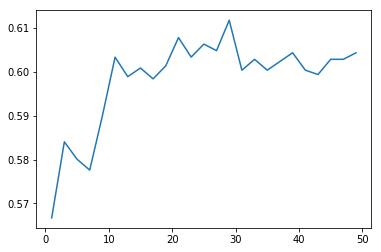

In [32]:

r = range(1, 50, 2)
sc = []

for n in r:
    sc1 = cross_val_score(KNeighborsClassifier(n_neighbors=n), X, y, cv=5, scoring="accuracy").mean()
#     print(sc1)
    sc.append(sc1)
    
plt.plot(r,sc)

This simple technique gives us the best K value.

We can use the best model from grid_knn to make predictions.

In [33]:
#Input 
x = [[0.2, .15, 0.68, 0.05, 0.328]]

#Make prediction 
grid_knn.predict(x)


array([1])

In [34]:
#Proability

grid_knn.predict_proba(x)


array([[0.13793103, 0.86206897]])

In [35]:


#Range of neighbors to test
depths_range = list(range(2, 20))

#Dictionary of parameter values 
param_grid_dt = {}
param_grid_dt["max_depth"] = depths_range
param_grid_dt


{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [36]:
#Intialize Grid

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring="accuracy")


#Fit grid on data
grid_dt.fit(X,y)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [37]:
#Best score for DT model
grid_dt.best_score_

0.6608824987605354

In [38]:
#Best parameter for DT model
grid_dt.best_params_

{'max_depth': 4}

In [39]:
#Make prediction

grid_dt.predict(x)

array([1])

So far our grids have been one-dimensional, now let's try using multiple dimensions

In [40]:
#Param grid with test different split criteria as well.
param_grid_dt = {'min_samples_split' : list(range(2, 30 ,2)), "max_depth": depths_range}

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]}

In [41]:
15*18*5

1350

In [42]:
#Intialize Grid
grid_dt =  GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring="accuracy")

#Fit grid on data
grid_dt.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [43]:
#Best parameter

grid_dt.best_params_

{'max_depth': 4, 'min_samples_split': 8}

In [44]:
#Best score

grid_dt.best_score_

0.6623698562221121

How many models did the grid search algorithm fit?

In [45]:
#Add another dimension
param_grid_dt["max_features"] = [1, 2, 3, 4, 5]

param_grid_dt

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'max_features': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]}

In [46]:
1350*5

6750

In [47]:
#import time 
from time import time

In [48]:
#Intialize Grid
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = param_grid_dt, cv = 5, scoring = "accuracy")

#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X, y)

#Print time difference

print (time() - t)

27.193203926086426


In [49]:
#Best parameter

grid_dt.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_split': 12}

In [50]:
#Best score

grid_dt.best_score_

0.6732771442736738

Obviously grid search takes a long time and in some case can cause memory errors. This is where RandomizedSearchCV comes in.

In [51]:
#Intialize RandomizedSearchCV grid with n_iter = 15
grid_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, param_distributions=param_grid_dt,
                            cv=5, scoring="accuracy")


#Time the code 

t = time()

#Fit grid on data
grid_dt.fit(X,y)

#Print time difference

print (time() - t)

0.3293178081512451


Reduced run time by  a whole a lot. But now let's see if we sacrificed performance.

In [52]:
#Check best score
grid_dt.best_params_



{'max_depth': 9, 'max_features': 4, 'min_samples_split': 10}

In [53]:
grid_dt.best_score_

0.6395637084779375

### **Pipelines**

Let's go back to using the KNN model.

We know that we need to scale our data for the KNN algorithm right?

In [54]:
#Scale data and fit it a Grid search function it.

#Intialize scalar
# scale = StandardScaler()

#Fit and transform scaler on the data
# Xs = scale.fit_transform(X)

Time to make a pipeline

In [55]:
#Pass scaler and knn classifier objects into make_pipeline function
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())


In [56]:
#Create new param_grid
neighbors_range = list(range(2, 21))
param_grid_knn = {}
param_grid_knn["kneighborsclassifier__n_neighbors"] = neighbors_range
param_grid_knn

{'kneighborsclassifier__n_neighbors': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [57]:
#Pass in pipe into GridSearchCV function, 
grid_knn_pipe = GridSearchCV(pipe, param_grid=param_grid_knn, cv=5, scoring="accuracy")


#Fit on original versions of data
grid_knn_pipe.fit(X,y)


#Best scores and params
print (grid_knn_pipe.best_score_, grid_knn_pipe.best_params_)

0.6063460585027268 {'kneighborsclassifier__n_neighbors': 17}


In [58]:
grid_knn_pipe = GridSearchCV(pipe, param_grid=param_grid_knn, cv=5, scoring="accuracy")

grid_knn_pipe.get_params()

{'cv': 5, 'error_score': 'raise', 'estimator': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'))]), 'estimator__kneighborsclassifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'), 'estimator__kneighborsclassifier__algorithm': 'auto', 'estimator__kneighborsclassifier__leaf_size': 30, 'estimator__kneighborsclassifier__metric': 'minkowski', 'estimator__kneighborsclassifier__metric_params': None, 'estimator__kneighborsclassifier__n_jobs': 1, 'estimator__kneighborsclassifier__n_neighbors': 5, 'estimator__kneighborsclassifier__p': 2, 'estimator__kneighborsclassifier__weights': 'uniform', 'estimator__memory': None, 'estima

In [59]:
# Use the cross-validation process using Pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

cross_val_score(pipe, X, y, cv=5, scoring="accuracy").mean()


0.5775851902808146

## Multi-class Supervised Learning

So far in our classification lessons we've mainly modeling binary classification datasets aka either-or data. In this class we're going to work through the MNIST digits dataset and learn to work with and interpret models trained on multiple classes—multiple meaning more than two.

Before we get into the MNIST dataset, let's bring back the Iris dataset

In [60]:
#Load in iris data using seaborn
# iris = sb.load_dataset("iris")

path = "../../data/iris.csv"

iris = pd.read_csv(path)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The iris dataset is a mulit-class dataset because there are three uniques values in the dependent variable

In [61]:
#The class of species
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Now let's model this data and using a confusion matrix to analyze the results.

In [62]:
#Step 1. Assign X and y

X = iris.drop('species', axis=1)

y = iris.species


#Step 2. train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=27)


#Step 3. Fit KNN model with 3 neighbors on training data

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

#Step 4. Make predictions on the X_test using the model

preds = knn.predict(X_test)

#Step 5. Score predictions

knn.score(X_test, y_test)


0.88

Pretty decent model right? Now let's use the confusion matrix to better understand our predictions, particulary the wrong ones.

In [63]:

#Call pass in y_test and preds into confusion_matrix object

cm = confusion_matrix(y_test, preds)


cm

array([[13,  0,  0],
       [ 0, 15,  3],
       [ 0,  3, 16]])

Let's turn this into a dataframe

In [64]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [65]:
#Column and index values for our confusion matrix dataframe
cols = ["pred_setosa", "pred_versicolor", "pred_virginica"]
index = ["actual_setosa", "actual_versicolor", "actual_virginica"]

#Make dataframe out of confusion matrix

cm_df = pd.DataFrame(cm, columns=cols, index=index)

cm_df

,pred_setosa,pred_versicolor,pred_virginica
actual_setosa,13,0,0
actual_versicolor,0,15,3
actual_virginica,0,3,16


The accuracy score told us that our model correctly classified 88% of the testing dataset.

What does the confusion matrix tell us that the accuracy score doesn't? What is the accuracy if we ignore setosa?

In [66]:
#Non setosa accuracy score

(16+15+16)/(16+15+16+3+3)

0.8867924528301887

The 13, 15, 16, represent the values that we correctly identified.

The two 3 values represent the values that we incorrectly identified.

<br>

If we want to calculate the recall and precision scores then we need to designate one of the classes as true and the rest as false

![ee](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAykAAAAJDUzZGVlZGM0LTUyNWMtNDNjZi1hNjkxLTdlZjEzY2VmMmM4OQ.png)

Precision = TP/TP+FP

Recall = TP/TP+FN

Good blog post to refresh your memory on these metrics:http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [67]:
#The recall score for setaosa

tp_set = cm_df.loc["actual_setosa", "pred_setosa"]

#Divide tp_set by the sum of values in the actual setosa row

tp_set/float(cm_df.loc["actual_setosa"].sum())

1.0

In [68]:
tp_set

13

In [69]:
#The precision score for setosa



#Divide tp_set by the sum of values in the predicted setosa column

tp_set/float(cm_df.pred_setosa.sum())

1.0

We got perfect scores but thats boring, let's try this with versicolor

In [70]:
#The recall score for versicolor

tp_ver = cm_df.loc["actual_versicolor", "pred_versicolor"]

#Divide tp_set by the sum of values in the actual versicolor row

tp_ver/float(cm_df.loc["actual_versicolor"].sum())

0.8333333333333334

In [71]:
#The precision score for versicolor

#Divide tp_set by the sum of values in the predicted versicolor column

tp_ver/float(cm_df.pred_versicolor.sum())

0.8333333333333334

Multi-class confusion matrix explained:
![s](https://3.bp.blogspot.com/-YpiS7AXxlgs/VEVrZGx5oaI/AAAAAAAAG1c/E8PdwoUamYw/s1600/multi-class-confusionmatrix.png)

[Source](http://text-analytics101.rxnlp.com/2014/10/computing-precision-and-recall-for.html)

## MNIST Dataset

Famous machine learning dataset that is frequently used over and over again in machine learning courses.
http://yann.lecun.com/exdb/mnist/

The hand written digits of the mnist dataset.
![a](https://kuanhoong.files.wordpress.com/2016/01/mnistdigits.gif)

In [72]:
#Load in dataset from sklearn
from sklearn import datasets

In [73]:
digits_dict = datasets.load_digits()

In [74]:
digits_dict

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [75]:
#Data description
digits_dict["DESCR"].split("\n")

['Optical Recognition of Handwritten Digits Data Set',
 '===================================================',
 '',
 'Notes',
 '-----',
 'Data Set Characteristics:',
 '    :Number of Instances: 5620',
 '    :Number of Attributes: 64',
 '    :Attribute Information: 8x8 image of integer pixels in the range 0..16.',
 '    :Missing Attribute Values: None',
 "    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)",
 '    :Date: July; 1998',
 '',
 'This is a copy of the test set of the UCI ML hand-written digits datasets',
 'http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits',
 '',
 'The data set contains images of hand-written digits: 10 classes where',
 'each class refers to a digit.',
 '',
 'Preprocessing programs made available by NIST were used to extract',
 'normalized bitmaps of handwritten digits from a preprinted form. From a',
 'total of 43 people, 30 contributed to the training set and different 13',
 'to the test set. 32x32 bitmaps are divided into non

In [76]:
#Load in data

data = digits_dict["data"]

target = digits_dict["target"]

In [77]:
#Look at data
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [78]:
#Look at target variable
target

array([0, 1, 2, ..., 8, 9, 8])

In [79]:
data.shape

(1797, 64)

In [80]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits_dict.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits_dict.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [81]:
#View data of single digit

data[1].reshape(8, 8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Can you tell what number this data is showing?

In [82]:
target[1]

1

Let's visualize the digits

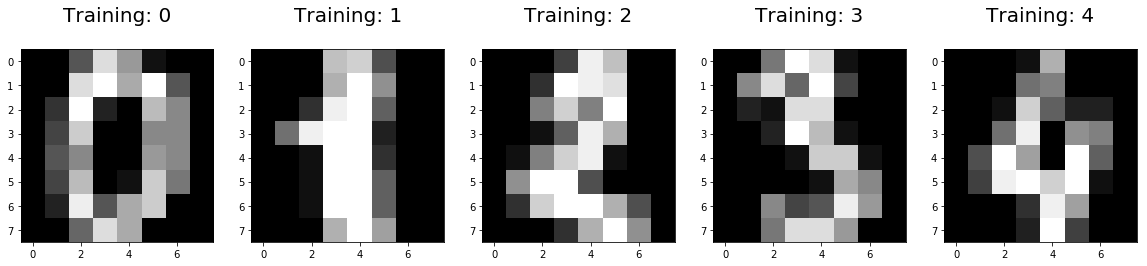

In [83]:
#Use matplotlib to view the images
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data[0:5], target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [84]:
data[10].reshape(8, 8)

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [85]:
target[10]

0

In [86]:
data[100].reshape(8, 8)

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [87]:
target[100]

4

Now let's use a logistic regression algorithm to model this data

In [88]:

#Step 1. train test split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=19)


#Step 2. Fit DecisionTreeClassifier with max_depth 10 on training data

lr = LogisticRegression()
lr.fit(X_train, y_train)

#Step 3. Make predictions on the X_test using the model
preds = lr.predict(X_test)



#Step 4. Score predictions
lr.score(X_test, y_test)


0.933240611961057

In [89]:
pd.value_counts(target, normalize=True)

3    0.101836
5    0.101280
1    0.101280
6    0.100723
4    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
dtype: float64

Confusion matrix time

In [90]:
#Create confusion matrix from predictions and y_test

cm_digits = pd.DataFrame(confusion_matrix(y_test, preds))

cm_digits

,0,1,2,3,4,5,6,7,8,9
0,61,0,0,0,1,0,0,0,0,0
1,0,63,0,0,0,0,0,0,2,0
2,0,0,77,0,0,0,0,0,1,0
3,0,0,0,65,0,1,0,3,6,1
4,0,1,0,0,66,0,0,1,0,1
5,0,2,0,0,0,69,0,0,0,2
6,0,0,0,0,1,1,72,0,1,0
7,0,1,0,0,0,0,0,69,1,4
8,0,5,0,1,0,1,0,0,61,0
9,0,4,0,2,1,1,0,0,2,68


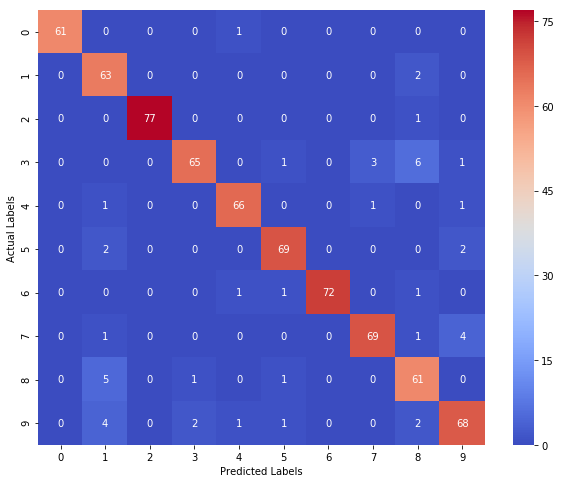

In [91]:
#Heatmap version

plt.figure(figsize=(10, 8))
sb.heatmap(cm_digits, annot=True, cmap= "coolwarm")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels");

What does this tell us?

In [92]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

Let's see some of the images we got wrong.

In [93]:
#Identify indices of wrong predictions
index = 0
false_index = []

In [94]:
false_preds = y_test != preds

for i, e in enumerate(false_preds):
    if e: 
        false_index.append(i)

In [95]:
# misclassifiedIndexes

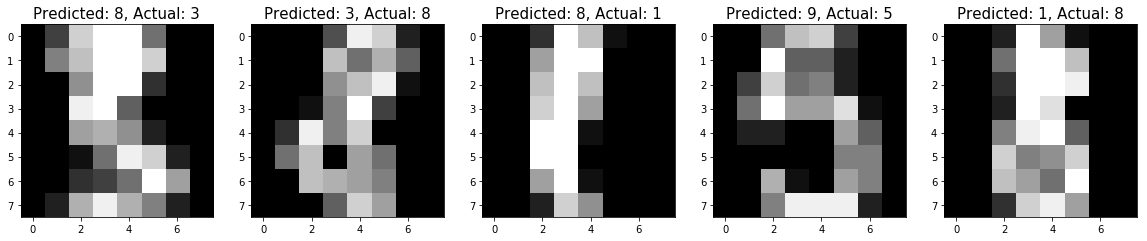

In [96]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(false_index[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(preds[badIndex], y_test[badIndex]), fontsize = 15)

Class exercise time: 

Which digit did our model do the best at identifying? What digit was the worst?

In [97]:
y_test.shape[0]

719

In [98]:
cm_digits

,0,1,2,3,4,5,6,7,8,9
0,61,0,0,0,1,0,0,0,0,0
1,0,63,0,0,0,0,0,0,2,0
2,0,0,77,0,0,0,0,0,1,0
3,0,0,0,65,0,1,0,3,6,1
4,0,1,0,0,66,0,0,1,0,1
5,0,2,0,0,0,69,0,0,0,2
6,0,0,0,0,1,1,72,0,1,0
7,0,1,0,0,0,0,0,69,1,4
8,0,5,0,1,0,1,0,0,61,0
9,0,4,0,2,1,1,0,0,2,68


In [99]:
cm_digits.drop(0)

,0,1,2,3,4,5,6,7,8,9
1,0,63,0,0,0,0,0,0,2,0
2,0,0,77,0,0,0,0,0,1,0
3,0,0,0,65,0,1,0,3,6,1
4,0,1,0,0,66,0,0,1,0,1
5,0,2,0,0,0,69,0,0,0,2
6,0,0,0,0,1,1,72,0,1,0
7,0,1,0,0,0,0,0,69,1,4
8,0,5,0,1,0,1,0,0,61,0
9,0,4,0,2,1,1,0,0,2,68


In [100]:
# #Accuracy score answer 

# digit_accuracy_dict = {}

# observations_number = y_test.shape[0]

# for i in range(10):
#     tp = cm_digits.iloc[i, i]
#     tn = cm_digits.drop(i).drop(i, axis = 1).sum().sum()
#     indices = [ind for ind in range(10) if ind != i]
#     fp = cm_digits.iloc[indices, i].sum()
#     fn = cm_digits.iloc[i, indices].sum()
#     acc_score = (tp + tn)/float(tp + tn + fp + fn)
#     digit_accuracy_dict[str(i)] = acc_score
    
# sorted(digit_accuracy_dict.items(), key= lambda x:x[1], reverse = True)

In [101]:
#Accuracy score answer 

digits_accuracy_dict = {}

observations_number = y_test.shape[0]

for i in range(10):
    tp = cm_digits.iloc[i,i]
    tn = cm_digits.drop(i, axis=1).sum().sum()
    indices = [ind for ind in  range(10) if ind!=i]
    fp = cm_digits.iloc[indices, i].sum()
    fn = cm_digits.iloc[i, indices].sum()
    acc_score = (tp + tn)/float(tp + tn + fp + fn)
    digits_accuracy_dict[str(i)]=acc_score

sorted(digits_accuracy_dict.items(), key = lambda x:x[1], reverse=True)

[('0', 0.9986111111111111),
 ('2', 0.9986111111111111),
 ('6', 0.9958448753462604),
 ('4', 0.9916897506925207),
 ('5', 0.9889349930843707),
 ('7', 0.9862068965517241),
 ('3', 0.9808219178082191),
 ('1', 0.9791955617198336),
 ('9', 0.9753086419753086),
 ('8', 0.9724517906336089)]

In [102]:
#Precision score answer 

digits_precision_dict = {}

observations_number = y_test.shape[0]

for i in range(10):
    tp = cm_digits.iloc[i,i]
#     tn = cm_digits.drop(i, axis=1).sum().sum()
    indices = [ind for ind in  range(10) if ind!=i]
    fp = cm_digits.iloc[indices, i].sum()
#     fn = cm_digits.iloc[i, indices].sum()
    prec_score = (tp )/float(tp+fp)
    digits_precision_dict[str(i)]=prec_score

sorted(digits_precision_dict.items(), key = lambda x:x[1], reverse=True)



[('0', 1.0),
 ('2', 1.0),
 ('6', 1.0),
 ('4', 0.9565217391304348),
 ('3', 0.9558823529411765),
 ('5', 0.9452054794520548),
 ('7', 0.9452054794520548),
 ('9', 0.8947368421052632),
 ('1', 0.8289473684210527),
 ('8', 0.8243243243243243)]

In [103]:
#Recall score answer 

digits_recall_dict = {}

observations_number = y_test.shape[0]

for i in range(10):
    tp = cm_digits.iloc[i,i]
#     tn = cm_digits.drop(i, axis=1).sum().sum()
    indices = [ind for ind in  range(10) if ind!=i]
#     fp = cm_digits.iloc[indices, i].sum()
    fn = cm_digits.iloc[i, indices].sum()
    recall_score = (tp )/float(tp+fn)
    digits_recall_dict[str(i)]=recall_score

sorted(digits_recall_dict.items(), key = lambda x:x[1], reverse=True)




[('2', 0.9871794871794872),
 ('0', 0.9838709677419355),
 ('1', 0.9692307692307692),
 ('6', 0.96),
 ('4', 0.9565217391304348),
 ('5', 0.9452054794520548),
 ('7', 0.92),
 ('8', 0.8970588235294118),
 ('9', 0.8717948717948718),
 ('3', 0.8552631578947368)]

## Imbalanced Class Machine Learning

As if often the case in real-world machine learning, there is a huge imbalance between the distribution of class of the variable we're trying to predicting.

Class False: 98.23%

Class True: 1.77%

Illustrated example
![www](http://www.svds.com/wp-content/uploads/2016/08/messy.png)

The main problem that imbalanced machine learning project present that is they render the accuracy score metric almost irrelevant.

If our null accuracy is 99.5%, then we don't have much room for improvement.

<br>

Imagine a confusion with 1000 TNs, 20 FPs, 15 FNs, and 25 TPs. What would the accuracy, precision, and recall scores be?

In [104]:
#Confusion matrix form
pd.DataFrame(data=[[1000, 20], [15, 25]], 
             columns=["Predicted_False", "Predicted_True"], 
             index=["Actual_False", "Actual_True"])

,Predicted_False,Predicted_True
Actual_False,1000,20
Actual_True,15,25


In [105]:
#Assign variables

tn = 1000.
fp = 20.
fn = 15.
tp = 25.

In [106]:
#Accuracy score

(tp + tn)/(tn + fp + fn + tp)

0.9669811320754716

Pretty good score! Or is it???

In [107]:
#Whats the null accuracy

(tn + fp)/(tn + fp + fn + tp)

0.9622641509433962

We hardly beat the null accuracy. Now let's calculate precision and recall

In [108]:
#Precision

tp/(tp + fp)

0.5555555555555556

In [109]:
#Recall
tp/(tp + fn)

0.625

Do we have a good model or not?

Let's move onto the real thing by modeling credit card fraud data

https://www.kaggle.com/dalpozz/creditcardfraud

In [110]:
path = "../../data/fraud.csv"

fraud = pd.read_csv(path, index_col=[0])

fraud.drop("Time", axis = 1, inplace = True)
fraud.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
15,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,0.747731,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
16,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,-0.267975,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0
21,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,...,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0


The V features are principal components which we'll learn about next Thursday, in the meantime think of them as hidden features.

Let'see how imbalanced the classes are

In [111]:
#Value counts without normalize

fraud.Class.value_counts()

0    64315
1      492
Name: Class, dtype: int64

In [112]:
#Value counts with normalize
fraud.Class.value_counts(normalize=True)

0    0.992408
1    0.007592
Name: Class, dtype: float64

That is pretty imbalanced would you say?

In [113]:
#Quick EDA to find relationship amount and fraud status

fraud.groupby("Class").mean()["Amount"]

Class
0     89.589643
1    122.211321
Name: Amount, dtype: float64

What does this say about the relationship between amount of the transaction and fraudelent status?

reduce the false negatives

Before we get into modeling, what metric should we try to minimize False Negatives or False Positives? Why?

Let's do some modeling.

Train a logistic regression model and evaluate it on the testing dataset using accuracy, recall, and precision scores

In [114]:
#Assign variables

X = fraud.drop("Class", axis = 1)

y = fraud.Class

In [115]:
#Make a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 25)

In [116]:
#Fit logistic regression model on training data

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
#Null accuracy of testing data

y_test.value_counts(normalize=True)


0    0.992979
1    0.007021
Name: Class, dtype: float64

In [118]:
#Evaluate it on testing set using accuracy score

preds = lr.predict(X_test)
accuracy_score(y_test, preds)

0.9981869382401728

In [138]:
#Evaluate it on testing set using precision score

precision_score(y_test, preds)


0.9411764705882353

In [139]:
#Evaluate it on testing set using recall score

recall_score(y_test, preds)

TypeError: 'numpy.float64' object is not callable

In [140]:
#Confusion matrix

confusion_matrix(y_test, preds)

array([[25732,     9],
       [   38,   144]])

What do these metrics tell us about our dataset?

38 frauds that are passing our model

Cross validation time

In [141]:
#Cross validate using precision score

cross_val_score(LogisticRegression(), X, y, cv=5, scoring="precision").mean()

0.9456811815635346

In [142]:
#Cross validate using recall score

cross_val_score(LogisticRegression(), X, y, cv=5, scoring="recall").mean()

0.7639868068439497

In [143]:
#Cross validate using roc_auc score

cross_val_score(LogisticRegression(), X, y, cv=5, scoring="roc_auc").mean()

0.9747032268272591

note: u have to convert the target variable to numeric when using precision as scoring

Make a roc curve

In [ ]:
#Derive probabilities of class 1 from the test set

test_probs = lr.predict_proba(X_test)[:,1]

#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)

#Outputs the fpr, tpr, for varying thresholds

In [ ]:
#Plot ROC_curve again but this time annotate the curve with the threshold value
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=12, alpha = .6)
plt.plot([0,1], [0,1], "--", alpha=.6)
for label, x, y in zip(thres[::10], fpr[::10], tpr[::10]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y ), size = 15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

How do you interpret this chart?

### Imbalanced class techniques

![eop](https://chrisalbon.com/images/machine_learning_flashcards/Downsampling_print.png)
Source: Chris Albon

Let's go ahead apply down sampling to our training dataset

In [121]:
#How many true class are there in the training dataset?

fraud.Class.value_counts()

0    64315
1      492
Name: Class, dtype: int64

In [122]:
#Assign number of fraud class in training data to variable
N = fraud.Class.value_counts()[1]
N

492

In [123]:
#Import resample function from sklearn
from sklearn.utils import resample

fraud_maj = fraud[fraud.Class==0]
fraud_min = fraud[fraud.Class==1]
 
# Downsample majority class
fraud_majority_downsampled = resample(fraud_maj, 
                                 replace=False,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_ds = pd.concat([fraud_majority_downsampled, fraud_min])
 
# Display new class counts
fraud_ds.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [124]:
fraud_ds.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
113503,-1.012299,0.995241,0.353303,0.735962,-0.207853,-0.124634,0.983214,0.044060,-0.161539,0.159070,...,0.014358,0.231471,-0.179128,-0.467340,-0.138021,-0.306288,-0.050976,-0.125859,130.00,0
2197,-1.518956,1.095081,0.612097,-0.041425,0.761113,0.055685,0.486362,0.079485,-0.143197,0.660505,...,-0.427464,-0.721773,0.185115,-1.016790,0.052044,0.253570,0.422374,0.203202,5.49,0
74762,-0.868168,0.722036,1.171282,-0.801868,0.455594,-0.771818,1.097742,-0.147202,-0.482216,-0.757111,...,0.045392,0.117449,-0.041530,0.103270,0.096478,0.471568,-0.087676,0.058702,32.67,0
271129,-1.915878,2.502017,-1.988535,-0.614405,-0.503084,-0.871443,-0.478248,1.595287,-0.463069,-0.108021,...,0.489716,1.356454,0.055985,-0.421965,-0.506943,-0.188719,0.326616,0.241852,0.89,0
115536,-0.218422,0.886858,0.959557,-0.348824,0.708016,0.027101,0.742896,-0.022160,-0.296484,-0.107644,...,-0.347275,-0.838003,-0.187195,-0.913664,-0.088850,0.101170,0.069062,-0.148229,8.94,0


Perfectly balanced classes. Let's use cross validate to see how well our model does.

Use accuracy, recall, precision, and roc_auc metrics

In [125]:
X_ds = fraud_ds.drop("Class", axis = 1)
y_ds = fraud_ds.Class

cross_val_score(LogisticRegression(), X_ds, y_ds, cv = 5, scoring="accuracy").mean()

0.9278086992372707

In [126]:
#Precision
cross_val_score(LogisticRegression(), X_ds, y_ds, cv = 5, scoring="precision").mean()

0.9585630164258212

In [127]:
#Recall
cross_val_score(LogisticRegression(), X_ds, y_ds, cv = 5, scoring="recall").mean()

0.8942692228406515

In [128]:
#ROC
cross_val_score(LogisticRegression(), X_ds, y_ds, cv = 5, scoring="roc_auc").mean()

0.9588887711778427

What does this tell us about our model and our data?

![aw](https://chrisalbon.com/images/machine_learning_flashcards/Upsampling_print.png)

In [129]:

#Number non fraud observations
N = fraud.Class.value_counts()[0]

# Downsample majority class
fraud_minority_upsampled = resample(fraud_min, 
                                 replace=True,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_us = pd.concat([fraud_minority_upsampled, fraud_maj])
 
# Display new class counts
fraud_us.Class.value_counts()

1    64315
0    64315
Name: Class, dtype: int64

Cross validation again

In [133]:
#Assign X and y
X_us = fraud_us.drop("Class", axis = 1)
y_us = fraud_us.Class

#Accuracy score
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="accuracy").mean()

0.9464821581279639

In [134]:
#Precision score
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="precision").mean()

0.9701457901577344

In [135]:
#Recall
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="recall").mean()

0.9214180206794683

In [136]:
#Roc auc score
cross_val_score(LogisticRegression(), X_us, y_us, cv = 5, scoring="roc_auc").mean()

0.9853185069750758

Upsampling:

Pros:
1. Get more data

Cons:
1. Create a bias

With both techniques, our interpretation of the accuracy score is more meaningful.

![wee](https://svds.com/wp-content/uploads/2016/08/ImbalancedClasses_fig5.jpg)

However, there is an issue here and that is can a model trained on balanced data work well with imbalanced data? Let's find out!


We're going to train a logistic regression model on a downsampled training dataset and then apply it to an imbalanced testing dataset.

In [ ]:
#reassign variables

X = fraud.drop("Class", axis = 1)

y = fraud.Class

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 23)

In [ ]:
# X_train

Downsample data

In [ ]:
#Combine the two training datasets
train = X_train.copy()
train["Class"] = y_train

In [ ]:
#Class count
train.Class.value_counts()

In [ ]:
N = train.Class.value_counts()[1]

fraud_maj = train[train.Class==0]
fraud_min = train[train.Class==1]
 
# Downsample majority class
fraud_majority_downsampled = resample(fraud_maj, 
                                 replace=False,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_ds = pd.concat([fraud_majority_downsampled, fraud_min])
 
# Display new class counts
fraud_ds.Class.value_counts()


Train Logistic Regression on downsampled data and evaluate it on testing data

In [ ]:
#Assign X and y
fraud_ds_X = fraud_ds.drop("Class", axis = 1)
fraud_ds_y = fraud_ds.Class
#Intialize
lr = LogisticRegression()
lr.fit(fraud_ds_X, fraud_ds_y)

In [ ]:
#Null accuracy 

y_test.value_counts(normalize=True)

In [ ]:
#Evaluate on testing dataset

preds = lr.predict(X_test)

accuracy_score(y_test, preds)

In [ ]:
#precision

precision_score(y_test, preds)

In [ ]:
#recall

recall_score(y_test, preds)

In [ ]:
#Confusion matrix
confusion_matrix(y_test, preds)

What's your interpretation now?

<br>
Let's the upsampling technique to see if that produces a better model.

In [ ]:
N = train.Class.value_counts()[0]

fraud_maj = train[train.Class==0]
fraud_min = train[train.Class==1]
 
# Downsample majority class
fraud_minority_upsampled = resample(fraud_min, 
                                 replace=True,     # Do not sample with replacement
                                 n_samples=N,    # to match minority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
fraud_us = pd.concat([fraud_minority_upsampled, fraud_maj])
 
# Display new class counts
fraud_us.Class.value_counts()

In [ ]:
#Assign X and y
fraud_us_X = fraud_ds.drop("Class", axis = 1)
fraud_us_y = fraud_ds.Class
#Intialize
lr = LogisticRegression()
lr.fit(fraud_us_X, fraud_us_y)

In [ ]:
#Evaluate on testing dataset

preds = lr.predict(X_test)

accuracy_score(y_test, preds)

In [ ]:
#precision

precision_score(y_test, preds)

In [ ]:
#recall

recall_score(y_test, preds)

In [ ]:
#Confusion matrix
confusion_matrix(y_test, preds)

What do we make of these results??

Here's the good news. We can set a class_weight setting in our models to be assigned to "balanced".

From sklearn:

"The 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))."



We'll cross validate with Logistic Regression, Decision Trees, and RandomForest models with the class_weight parameter set to "balanced."

But first let's calculate those weights

In [ ]:
#Class 0 weight
(y.shape[0])/float((2*y.value_counts()[0]))

In [ ]:
#Class 1 weight
(y.shape[0])/float((2*y.value_counts()[1]))

In [ ]:
y.value_counts()

In [ ]:
#multiple class counts by weights
64315*0.5038249242011972

In [ ]:

65*492

In [ ]:
#Logistic regression 

cross_val_score(LogisticRegression(class_weight="balanced"), 
                X, y, cv = 5, scoring="accuracy").mean()

In [ ]:
#Decision Tree with max depth = 12

cross_val_score(DecisionTreeClassifier(class_weight="balanced", max_depth=14), 
                X, y, cv = 5, scoring="accuracy").mean()

In [ ]:
#Random Forest with n_estimators = 40

cross_val_score(RandomForestClassifier(class_weight="balanced", n_estimators=40), 
                X, y, cv = 5, scoring="accuracy").mean()

# Resources

MNIST:

- https://github.com/grfiv/MNIST/blob/master/knn/knn.ipynb
- https://github.com/monsta-hd/ml-mnist
- https://www.youtube.com/watch?v=aZsZrkIgan0
- http://joshmontague.com/posts/2016/mnist-scikit-learn/

Multi-class:

- https://gallery.cortanaintelligence.com/Competition/Tutorial-Competition-Iris-Multiclass-Classification-2
-https://www.youtube.com/watch?v=6kzvrq-MIO0


Imbalanced classes:

- https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba
- https://svds.com/learning-imbalanced-classes/
- https://www.youtube.com/watch?v=X9MZtvvQDR4
- https://elitedatascience.com/imbalanced-classes
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

Grid Search and Pipelines

- https://chrisalbon.com/machine-learning/cross_validation_parameter_tuning_grid_search.html
- https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/
- https://www.youtube.com/watch?v=Gol_qOgRqfA
- https://chrisalbon.com/machine-learning/pipelines_with_parameter_optimization.html
- https://chrisalbon.com/machine-learning/hyperparameter_tuning_using_random_search.html
- https://machinelearningmastery.com/automate-machine-learning-workflows-pipelines-python-scikit-learn/
- https://www.civisanalytics.com/blog/workflows-in-python-using-pipeline-and-gridsearchcv-for-more-compact-and-comprehensive-code/

## Bonus: Gridsearch with Regression

In [ ]:
#Load in boston dataset
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
boston = load_boston()
df = pd.DataFrame(boston["data"])
df.columns = boston["feature_names"]
df["MEDV"] = boston["target"]
df.head()

In [ ]:
#Assign X and y

X = df.drop("MEDV", axis =1)
y = df.MEDV

In [ ]:
#Use a Pipeline Class instead of function to establish pipeline
pipe_poly = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                           ('linearregression', LinearRegression())])                           

In [ ]:
#Select a few features from X
XX = X[["RM", "DIS", "NOX", "CRIM"]].copy()

In [ ]:
#Intialize range values for poly
poly_range = [1, 2, 3, 4, 5, 6, 7]

#Intialize grid dictionary
param_grid_poly = {}

#Input grid values
param_grid_poly["polynomialfeatures__degree"] = poly_range

#Establish the grid
poly_grid = GridSearchCV(pipe_poly, 
                         param_grid = param_grid_poly, cv=5, 
                         scoring='neg_mean_squared_error')

In [ ]:
poly_grid.fit(XX, y)

In [ ]:
pipe_poly = Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                            ('ridgeregression', Ridge())]) 

param_grid_ridge = {'polynomialfeatures__degree': [1, 2, 3, 4, 5],
              'ridgeregression__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = RandomizedSearchCV(pipe_poly, param_distributions=param_grid_ridge, 
                                n_iter = 5 , cv = 5, scoring='neg_mean_squared_error')
grid_ridge.fit(XX, y)

In [ ]:

print (grid_ridge.best_params_, grid_ridge.best_score_)